In [1]:
import numpy as np
import pandas as pd

# pd.set_option('display.height', 1000)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.set_option("max_colwidth", 200)
from IPython.core.display import HTML, display

display(HTML("<style>.container { width:100% !important; }</style>"))


def df_stats(df):
    from tabulate import tabulate

    print("\n***** Shape: ", df.shape, " *****\n")

    columns_list = df.columns.values.tolist()
    isnull_list = df.isnull().sum().values.tolist()
    isunique_list = df.nunique().values.tolist()
    dtypes_list = df.dtypes.tolist()

    list_stat_val = list(zip(columns_list, isnull_list, isunique_list, dtypes_list))
    df_stat_val = pd.DataFrame(
        list_stat_val, columns=["Name", "Null", "Unique", "Dtypes"]
    )
    print(tabulate(df_stat_val, headers="keys", tablefmt="psql"))
    return df.head()

/tmp/ipykernel_2430038/1667009573.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [4]:
df_metadata = pd.read_csv(
    "../DeepCORO/2_CathReport_MHI_Merged/2024_CathReport_first_value_in_interval_all.csv"
)

/tmp/ipykernel_2430038/543685750.py:1: DtypeWarning: Columns (18,91,92,185,186,209,210,211,341,342,343,344,345,346,348,350,354,355,356,359,360,361,362,363,364) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv("../DeepCORO/2_CathReport_MHI_Merged/2024_CathReport_first_value_in_interval_all.csv")


NameError: name 'os' is not defined

In [7]:
import os

# Dictionary of failed videos with their error messages
failed_videos = {
    "/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2024/2.16.840.1.114380.1.1.301467.286.1.0.20240215125904516.3.mp4": "could not broadcast input array from shape (1080,3,3) into shape (3,1080,3)",
    "/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2024/2.16.840.1.114380.1.1.301467.335.1.4.20240215125905026.3.mp4": "could not broadcast input array from shape (1080,3,3) into shape (3,1080,3)",
    "/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2024/2.16.840.1.114380.1.1.301467.638.1.5.20240215125905156.3.mp4": "could not broadcast input array from shape (1080,3,3) into shape (3,1080,3)",
    "/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2024/1.2.276.0.7230010.3.1.4.477015473.364.1728312816.971.mp4": "could not broadcast input array from shape (2480,3,3) into shape (3,2480,3)",
    "/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2024/1.2.276.0.7230010.3.1.4.477015473.3564.1728312817.298.mp4": "could not broadcast input array from shape (2480,3,3) into shape (3,2480,3)",
    "/media/data1/ravram/MHI_CATH_DICOM_VIDEOS/2024/1.2.276.0.7230010.3.1.4.477015473.7088.1713898871.309.mp4": "could not broadcast input array",
}

# Extract filenames without extension and search in df_metadata
failed_filenames = [
    os.path.splitext(os.path.basename(path))[0] for path in failed_videos.keys()
]
matching_rows = df_metadata[
    df_metadata["DICOMPath"].str.contains("|".join(failed_filenames), na=False)
].reset_index(drop=True)

Processing MONOCHROME2: /media/data1/ravram/DeepCORO/2024/307291/2.16.124.113611.1.118.1.1.6916584/1.3.12.2.1107.5.4.5.160423.30000024092711293988100000325/1.3.12.2.1107.5.4.5.160423.30000024092711293988100000324.512.dcm
Processing YBR_FULL_422: /media/data1/ravram/DeepCORO/2024/643927/2.16.124.113611.1.118.1.1.6789089/1.2.276.0.7230010.3.1.3.477015473.7488.1714435234.835/1.2.276.0.7230010.3.1.4.477015473.11568.1714435235.648.dcm
Processing RGB: /media/data1/ravram/DeepCORO/2024/641934/1.3.46.670589.52.2.540275.20240321.5092027.4779.10923/1.3.46.670589.29.18771927773542513355504009707321603211013291/1.3.46.670589.29.187719277735425202403211013297721020.dcm
Processing PALETTE COLOR: /media/data1/ravram/DeepCORO/2024/328284/2.16.124.113611.1.118.1.1.6934804/2.16.840.1.114432.2.24.10.21.16.47.58.91.0.148.1/2.16.840.1.114432.2.24.10.21.16.47.58.246.65.223.0.0.375.dcm
Processing YBR_FULL: /media/data1/ravram/DeepCORO/2024/642630/2.16.840.1.113883.3.234.1.3.101.1.2.1053.2024.11758301.2/2.16.

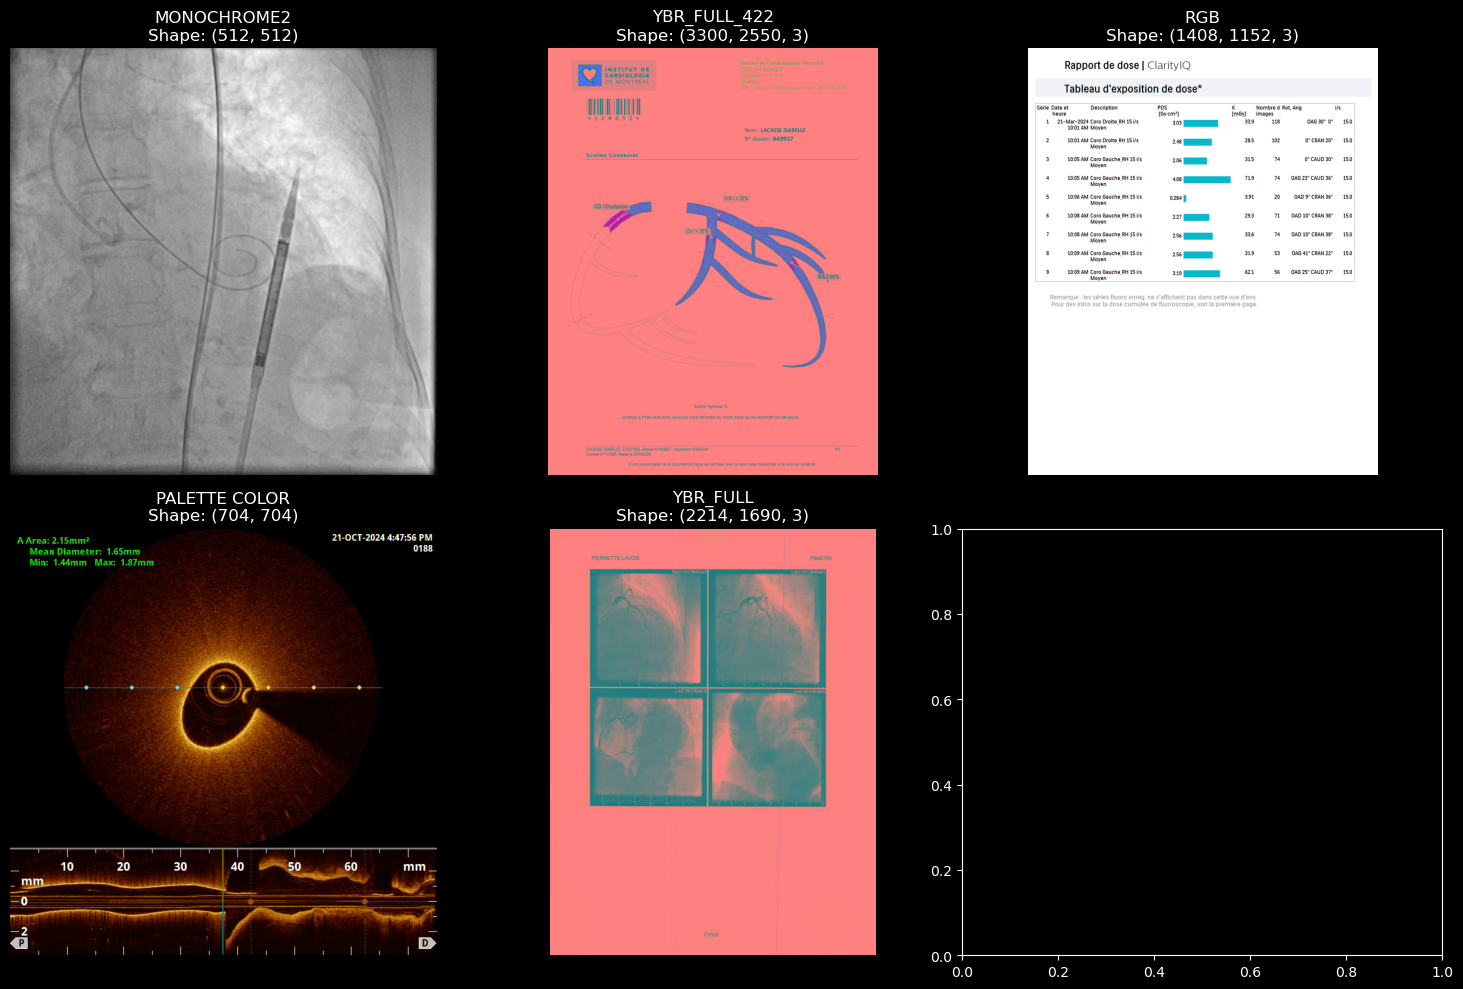

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom

# Create subplots for each PhotometricInterpretation type
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# List of PhotometricInterpretation types to process
photo_types = ["MONOCHROME2", "YBR_FULL_422", "RGB", "PALETTE COLOR", "YBR_FULL"]

for idx, photo_type in enumerate(photo_types):
    sample_row = (
        df_metadata[df_metadata["PhotometricInterpretation"] == photo_type]
        .sample(1)
        .iloc[0]
    )
    dicom_path = sample_row["DICOMPath"]
    print(f"Processing {photo_type}: {dicom_path}")

    ds = pydicom.dcmread(dicom_path)
    pixel_array = ds.pixel_array

    # Handle 4D (video) data: take the middle frame
    if pixel_array.ndim == 4:
        mid_frame = pixel_array.shape[0] // 2
        pixel_array = pixel_array[mid_frame]

    if photo_type == "MONOCHROME2":
        if pixel_array.ndim == 3:
            mid_frame = pixel_array.shape[0] // 2
            pixel_array = pixel_array[mid_frame]
        if pixel_array.ndim > 2:
            pixel_array = pixel_array[..., 0]
        axes[idx].imshow(pixel_array, cmap="gray")

    elif photo_type == "PALETTE COLOR":
        if pixel_array.ndim == 3:
            mid_frame = pixel_array.shape[0] // 2
            pixel_array = pixel_array[mid_frame]

        # Retrieve the LUT descriptor (e.g., [256, 0, 16])
        red_desc = ds[0x0028, 0x1101].value
        n_entries, first_index, bits = red_desc

        # Convert the LUT bytes to numpy arrays using frombuffer
        red_lut = np.frombuffer(ds[0x0028, 0x1201].value, dtype=np.uint16)[:n_entries]
        green_lut = np.frombuffer(ds[0x0028, 0x1202].value, dtype=np.uint16)[:n_entries]
        blue_lut = np.frombuffer(ds[0x0028, 0x1203].value, dtype=np.uint16)[:n_entries]

        # Scale LUT values to 8-bit if needed
        if bits > 8:
            factor = 2 ** (bits - 8)
            red_lut = (red_lut / factor).astype(np.uint8)
            green_lut = (green_lut / factor).astype(np.uint8)
            blue_lut = (blue_lut / factor).astype(np.uint8)
        else:
            red_lut = red_lut.astype(np.uint8)
            green_lut = green_lut.astype(np.uint8)
            blue_lut = blue_lut.astype(np.uint8)

        # Create a combined LUT (shape: [n_entries, 3])
        lut = np.stack((red_lut, green_lut, blue_lut), axis=-1)

        # Map the pixel indices to RGB values (adjust for first_index)
        rgb_image = lut[pixel_array - first_index]
        axes[idx].imshow(rgb_image)

    else:
        # For YBR_FULL_422, RGB, YBR_FULL, ensure proper shape for RGB display
        if pixel_array.ndim == 3 and pixel_array.shape[-1] != 3:
            pixel_array = np.transpose(pixel_array, (1, 2, 0))
        axes[idx].imshow(pixel_array)

    axes[idx].axis("off")
    axes[idx].set_title(f"{photo_type}\nShape: {pixel_array.shape}")

plt.tight_layout()
plt.show()

In [15]:
display(df_metadata.PhotometricInterpretation.value_counts())

PhotometricInterpretation
MONOCHROME2      138556
YBR_FULL_422      23167
RGB               14085
PALETTE COLOR       238
YBR_FULL             53
Name: count, dtype: int64

In [ ]:
import os


def list_files(dir):
    r = []
    subdirs = [x[0] for x in os.walk(dir)]
    for subdir in subdirs:
        files = os.walk(subdir).__next__()[2]

        if len(files) > 0:
            for file in files:
                r.append(os.path.join(subdir, file))
    return r

In [ ]:
# r = list_files("/media/data1/ravram/DeepOCT_Abbott")
# display(len(r), " files found")
# df = pd.DataFrame(list(zip(r)), columns=["path"])
# new_2 = df["path"].str.split("/", n=8, expand=True)

# df["StudyInstanceUID"] = new_2[6]
# df["patient_id"] = new_2[5]
# df["dicom_id"] = new_2[7]
# display(df.head(n=15))

In [ ]:
df_extracted = pd.read_csv("data/Abbott_OCT/database-c-find_ABBOTT.csv")
df_extracted = pd.DataFrame({"path": r})
df_extracted["FileType"] = df_extracted.path.apply(lambda x: x.split(".")[-1])
display("Total files", df_extracted.FileType.value_counts())

df_extracted = df_extracted.loc[df_extracted["FileType"] == "dcm"]
new_2 = df_extracted["path"].str.split("/", n=7, expand=True)

df_extracted["mrn"] = new_2[5]
df_extracted["StudyInstanceUID"] = new_2[6]
df_extracted["dicom_id"] = new_2[7].str.rstrip(".dcm")
df_extracted_study_level = (
    df_extracted.groupby(["mrn", "StudyInstanceUID"]).first().reset_index()
)

In [ ]:
df_extracted_m = pd.merge(
    df_extracted_study_level.drop(columns={"dicom_id", "path"}),
    df,
    how="inner",
    on=["StudyInstanceUID"],
)
display(
    df_extracted_m.loc[
        df_extracted_m["dicom_id"]
        == "1.3.12.2.1107.5.4.5.135214.30000022072511311760100000156.dcm"
    ]
)
df_extracted_m.to_csv("data/Abbott_OCT/df_extracted_m_ABBOTT.csv", index=False)

In [ ]:
df_extracted_m = pd.read_csv("data/Abbott_OCT/df_extracted_m_ABBOTT.csv")
display(
    df_extracted_m.loc[
        df_extracted_m["StudyInstanceUID"] == "2.16.124.113611.1.118.1.1.5884039"
    ]
)

### Extract AVI Metadata




In [ ]:
from downloadAvi import extract_avi_metadata as avi_meta

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydicom as dicom

df = pd.read_csv("data_Maher.csv")

dataset = dicom.dcmread(df.path.iloc[0], force=True)

testarray = dataset.pixel_array
testarray = np.stack((testarray,) * 3, axis=-1)

### Plot images for each class for the OBJECT RECON

In [ ]:
# This code will create a 1x11 subplot with each subplot showing the middle frame from a random video of the corresponding class. The title of each subplot is the class name.

In [ ]:
from random import choice

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Let's assume df is your dataframe with columns 'FileName' and 'Class'


def plot_middle_frames(df):
    classes = df["y_true_cat"].unique()
    fig, axs = plt.subplots(3, 4, figsize=(20, 20))

    for i, cls in enumerate(classes):
        # Select a random sample from each class
        sample = df[df["y_true_cat"] == cls].sample(1).iloc[0]
        video_path = sample["FileName"]

        # Load the video
        cap = cv2.VideoCapture(video_path)

        # Get the number of frames
        num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        # Select the middle frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, num_frames // 2)

        # Read the middle frame
        ret, frame = cap.read()

        # Plot the frame
        row = i // 4
        col = i % 4
        axs[row, col].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        axs[row, col].set_title(cls)
        axs[row, col].axis("off")  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()

### 